In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/AirQualityUCI.csv",sep=';',decimal=',',na_values='-200')
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Data Analysis (EDA) & Data Cleaning


In [ ]:
dataset.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
print(dataset.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


In [ ]:
dataset.isna().sum()

,0
Date,114
Time,114
CO(GT),1797
PT08.S1(CO),480
NMHC(GT),8557
C6H6(GT),480
PT08.S2(NMHC),480
NOx(GT),1753
PT08.S3(NOx),480
NO2(GT),1756


In [ ]:
numeric_cols = dataset.select_dtypes(include='number')

#Compute rolling avg and fill missing values for numeric columns
dataset[numeric_cols.columns] = numeric_cols.fillna(
    numeric_cols.rolling(175, min_periods=1).mean()
)

In [ ]:
dataset.isna().sum()

,0
Date,114
Time,114
CO(GT),0
PT08.S1(CO),0
NMHC(GT),8066
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:
rolling_avg = dataset['PT08.S4(NO2)'].rolling(window=175, min_periods=1).mean() #Around 24*7


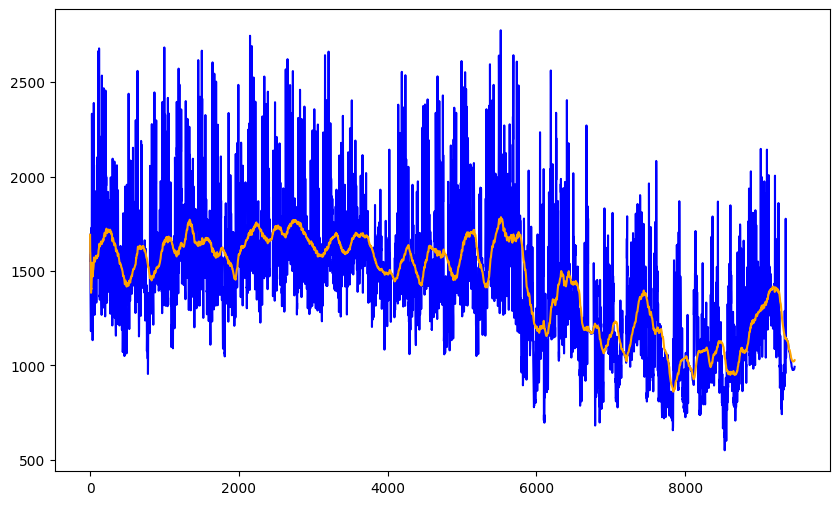

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['PT08.S4(NO2)'], label="CO Concentration", color="blue")

plt.plot(dataset.index, rolling_avg, label="Rolling Average (168)", color="orange")

In [ ]:
dataset = dataset.drop(['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [ ]:
dataset.tail()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,1.232813,969.569231,4.560000,709.938462,180.046154,885.476923,109.646154,984.000000,687.215385,16.830769,35.176923,0.611685
9467,NaN,NaN,1.239683,971.671875,4.598438,711.765625,180.796875,882.562500,109.812500,986.984375,691.578125,16.887500,35.229688,0.613745
9468,NaN,NaN,1.241935,972.920635,4.617460,712.349206,180.809524,881.412698,109.539683,989.111111,693.666667,16.939683,35.300000,0.615902
9469,NaN,NaN,1.237705,973.048387,4.598387,710.887097,179.209677,882.693548,108.500000,989.725806,690.516129,17.001613,35.353226,0.618066
9470,NaN,NaN,1.240000,975.262295,4.642623,713.032787,179.409836,879.868852,108.196721,992.983607,693.377049,17.072131,35.381967,0.620162


In [ ]:
dataset = dataset.dropna(how='any')

In [ ]:
dataset.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0


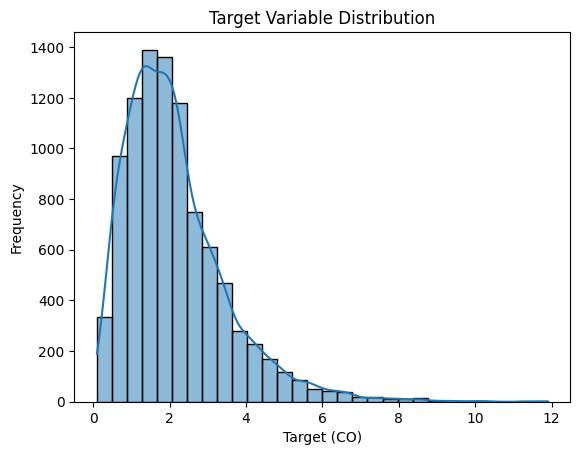

In [ ]:
sns.histplot(dataset['CO(GT)'], kde=True, bins=30)
plt.title("Target Variable Distribution")
plt.xlabel("Target (CO)")
plt.ylabel("Frequency")
plt.show()

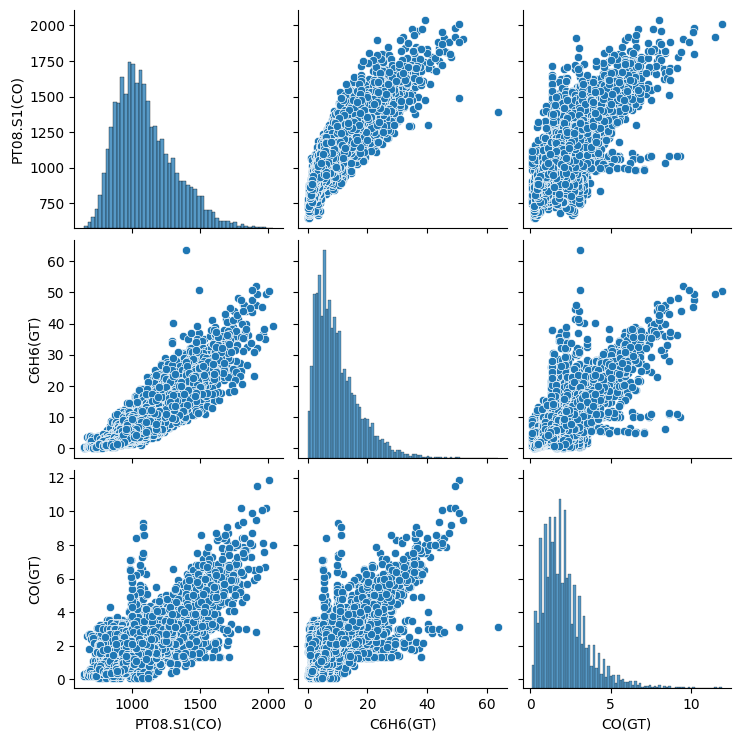

In [ ]:
sns.pairplot(dataset[['PT08.S1(CO)', 'C6H6(GT)', 'CO(GT)']])
plt.show()

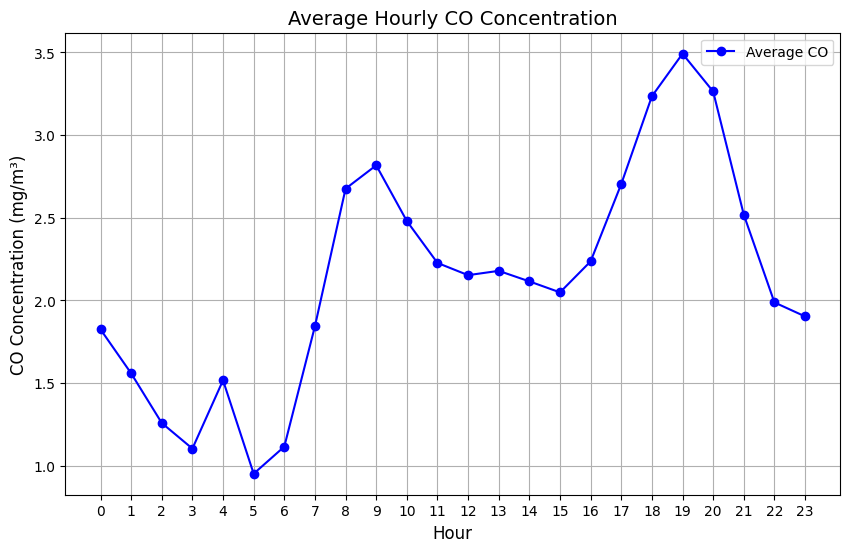

In [ ]:
dataset['Datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'], format='%d/%m/%Y %H.%M.%S')
dataset['timestamp'] = dataset['Datetime'].astype('int64') // 10**9  #Convert to seconds
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H.%M.%S', errors='coerce')
dataset['Hour'] = dataset['Time'].dt.hour #Extraction of hour only
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y', errors='coerce')

#Group by hour and calculate the average CO concentration
hourly_avg_co = dataset.groupby('Hour')['CO(GT)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_co.index, hourly_avg_co.values, marker="o", linestyle="-", color="blue", label="Average CO")
plt.title("Average Hourly CO Concentration", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("CO Concentration (mg/m³)", fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


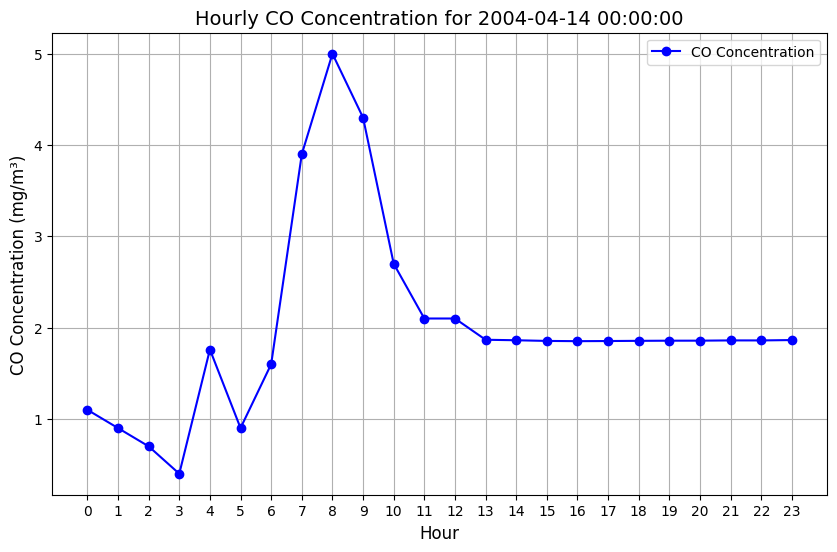

In [ ]:
#Select a random date
random_date = dataset['Date'].sample(n=1).iloc[0]

#Filter the dataset for the selected date
daily_data = dataset[dataset['Date'] == random_date]

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Hour'], daily_data['CO(GT)'], marker="o", linestyle="-", color="blue", label="CO Concentration")
plt.title(f"Hourly CO Concentration for {random_date}", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("CO Concentration (mg/m³)", fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()



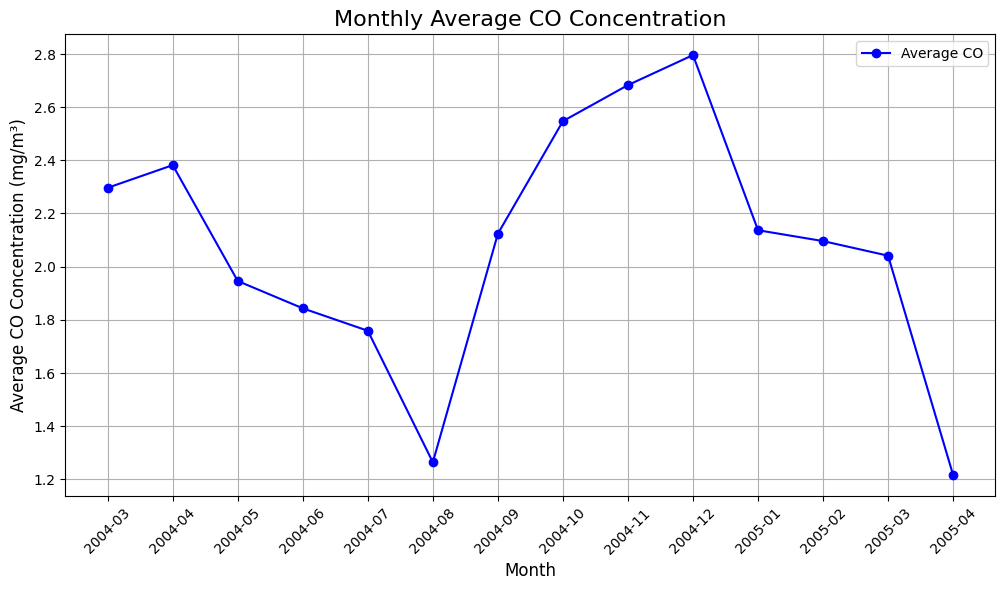

In [ ]:
#Extract the year-month for grouping
dataset['Month'] = dataset['Date'].dt.to_period('M')

#Group by month and calculate the average CO concentration
monthly_avg_co = dataset.groupby('Month')['CO(GT)'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_co.index.astype(str), monthly_avg_co.values, marker="o", linestyle="-", color="blue", label="Average CO")
plt.title("Monthly Average CO Concentration", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average CO Concentration (mg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

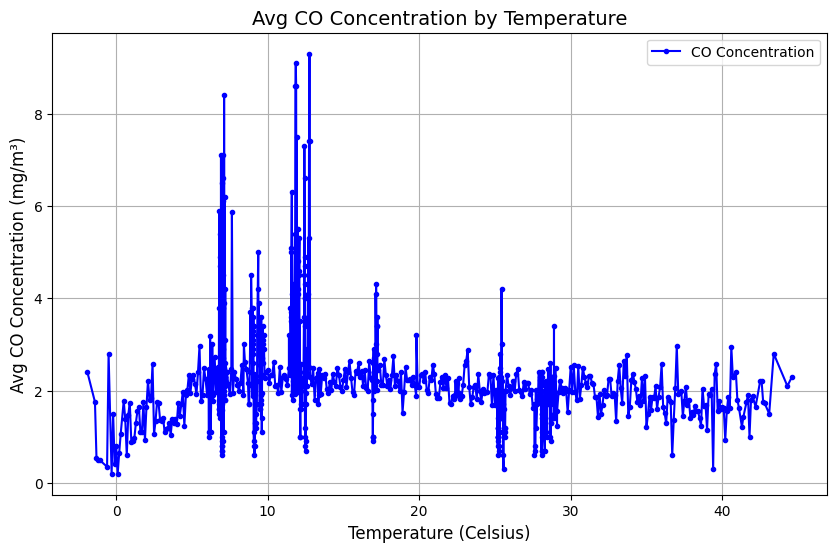

In [ ]:
#Sort the dataset by temperature
temp_asc = dataset.sort_values(by='T', ascending=True)

#Group by temperature and calculate the average CO concentration
temp_avg_co = temp_asc.groupby('T')['CO(GT)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(temp_avg_co.index, temp_avg_co, marker=".", linestyle="-", color="blue", label="CO Concentration")
plt.title("Avg CO Concentration by Temperature", fontsize=14)
plt.xlabel("Temperature (Celsius)", fontsize=12)
plt.ylabel("Avg CO Concentration (mg/m³)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


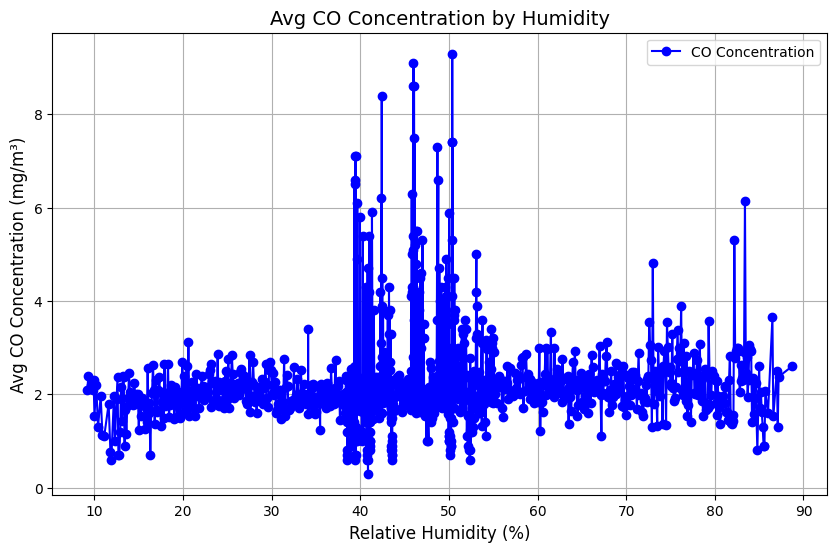

In [ ]:
#Sort dataset by RH
humid_asc = dataset.sort_values(by='RH', ascending=True)

#Group by humidity and calculate the average CO concentration
humid_avg_co = humid_asc.groupby('RH')['CO(GT)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(humid_avg_co.index, humid_avg_co, marker="o", linestyle="-", color="blue", label="CO Concentration")
plt.title(f"Avg CO Concentration by Humidity", fontsize=14)
plt.xlabel("Relative Humidity (%)", fontsize=12)
plt.ylabel("Avg CO Concentration (mg/m³)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


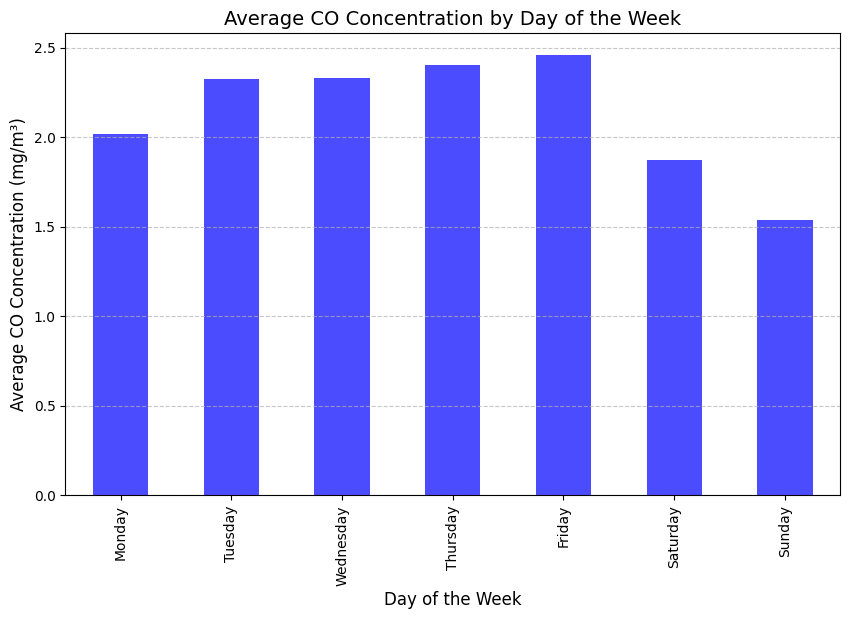

In [ ]:
import pandas as pd

#Extract the day of the week
dataset['DayOfWeek'] = dataset['Datetime'].dt.dayofweek

#Map day numbers to names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dataset['DayName'] = dataset['DayOfWeek'].map(day_names)

#Group by day name and calculate average CO concentration
average_co_by_day = dataset.groupby('DayName')['CO(GT)'].mean()

#Sort days of the week in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_co_by_day = average_co_by_day.reindex(ordered_days)

plt.figure(figsize=(10, 6))
average_co_by_day.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Average CO Concentration by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average CO Concentration (mg/m³)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
dataset = dataset.drop(['Date', 'Time', 'AH', 'Month','Datetime','DayName'], axis=1)


In [ ]:
print(dataset.dtypes)


CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
timestamp          int64
Hour               int32
DayOfWeek          int32
dtype: object


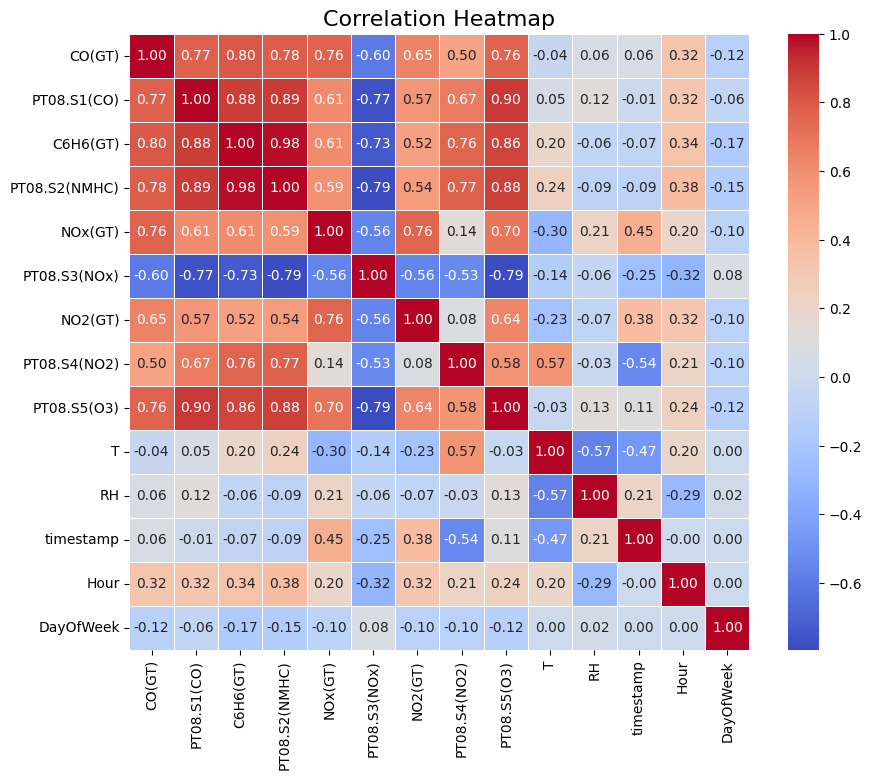

In [ ]:
correlation_table = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  timestamp      9357 non-null   int64  
 12  Hour           9357 non-null   int32  
 13  DayOfWeek      9357 non-null   int32  
dtypes: float64(11), int32(2), int64(1)
memory usage: 1023.4 KB


In [ ]:
dataset = dataset.drop(['T', 'timestamp', 'RH'], axis=1)


In [ ]:
target_name = "CO(GT)"
target = dataset[target_name]
dataset = dataset.drop(columns=target_name)

## Preprocessing (Scaling) & Initial Fitting with LR, DT & RF

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LR = make_pipeline(StandardScaler(), LinearRegression())
TR = make_pipeline(StandardScaler(), DecisionTreeRegressor())
RF = make_pipeline(StandardScaler(), RandomForestRegressor())
models = [LR, TR, RF]

for model in models:
    cv_result = cross_validate(model, dataset, target, cv=5, scoring=['r2', 'neg_mean_absolute_error'])
    r2_scores = cv_result['test_r2']
    mae_scores = -cv_result['test_neg_mean_absolute_error']

    model_name = model.steps[-1][1].__class__.__name__

    print(f"Model: {model_name}")
    print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
    print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}\n")


Model: LinearRegression
Mean R²: 0.695 ± 0.087
Mean MAE: 0.499 ± 0.093

Model: DecisionTreeRegressor
Mean R²: 0.500 ± 0.033
Mean MAE: 0.621 ± 0.097

Model: RandomForestRegressor
Mean R²: 0.682 ± 0.060
Mean MAE: 0.480 ± 0.068



### Fit w/o scaling for DT & RF

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LR = make_pipeline(StandardScaler(), LinearRegression())
TR = DecisionTreeRegressor()
RF =  RandomForestRegressor()
models = [LR, TR, RF]

for model in models:
    cv_result = cross_validate(model, dataset, target, cv=5, scoring=['r2', 'neg_mean_absolute_error'])
    r2_scores = cv_result['test_r2']
    mae_scores = -cv_result['test_neg_mean_absolute_error']


    print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
    print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}\n")


Mean R²: 0.695 ± 0.087
Mean MAE: 0.499 ± 0.093

Mean R²: 0.501 ± 0.046
Mean MAE: 0.615 ± 0.092

Mean R²: 0.680 ± 0.057
Mean MAE: 0.483 ± 0.067



In [ ]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
for model in models :
  print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Regularization & Tuning for LR (Ridge)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True),
)

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=50, random_state=0)
cv_results = cross_validate(
    ridge,
    dataset,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

In [ ]:
import numpy as np

#Extract trained estimators and the negative MSE test scores
estimators = cv_results['estimator']
neg_mae_scores = cv_results['test_score']

mae_scores = -neg_mae_scores

#Compute R² scores for each estimator
r2_scores = [estimator.score(dataset, target) for estimator in estimators]

print(f"Mean R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"Mean MAE: {np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")


Mean R²: 0.791 ± 0.000
Mean MAE: 0.379 ± 0.034


In [ ]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 2.48 and Max optimal alpha: 5.72


## Tuning for RF (Randomized Search & Nested CV)

In [ ]:
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.model_selection import KFold
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

randomized_search_rf = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=inner_cv,
    n_iter=10,
    scoring='r2',
    random_state=42
)

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

cv_results = cross_validate(
    randomized_search_rf,
    dataset,
    target,
    cv=outer_cv,
    scoring=scoring,
    n_jobs=2,
    return_train_score=False
)

r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_mae']

print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")


Mean R²: 0.873 ± 0.013
Mean MAE: 0.303 ± 0.007


## Tuning for Decision Tree Regressor (Randomized Search & Nested CV)

In [ ]:
model = DecisionTreeRegressor()

param_distributions = {
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

randomized_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=inner_cv,
    n_iter=10,
    scoring='r2',
    random_state=42
)

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

cv_results = cross_validate(
    randomized_search,
    dataset,
    target,
    cv=outer_cv,
    scoring=scoring,
    n_jobs=2,
    return_train_score=False
)

r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_mae']

print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")


Mean R²: 0.805 ± 0.014
Mean MAE: 0.385 ± 0.006


## RANSAC (Random Sample Consensus) Model

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = make_pipeline(StandardScaler(), RANSACRegressor())

cv_result = cross_validate(model, dataset, target, cv=5, scoring=['r2', 'neg_mean_absolute_error'])
r2_scores = cv_result['test_r2']
mae_scores = -cv_result['test_neg_mean_absolute_error']

model_name = model.steps[-1][1].__class__.__name__

print(f"Model: {model_name}")
print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}\n")


Model: RANSACRegressor
Mean R²: 0.681 ± 0.087
Mean MAE: 0.471 ± 0.058



In [ ]:
from sklearn.model_selection import KFold
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

model = RANSACRegressor()

param_distributions = {
    'min_samples': randint(10, 100),
    'residual_threshold': randint(1, 10),
    'max_trials': randint(50, 500),
}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

randomized_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=inner_cv,
    n_iter=10,
    scoring='r2',
    random_state=42
)

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

cv_results = cross_validate(
    randomized_search,
    dataset,
    target,
    cv=outer_cv,
    scoring=scoring,
    n_jobs=2,
    return_train_score=False
)

r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_mae']

print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")


Mean R²: 0.789 ± 0.016
Mean MAE: 0.420 ± 0.008


## Ablation Studies

In [ ]:
print(dataset.dtypes)


PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
Hour               int32
DayOfWeek          int32
dtype: object


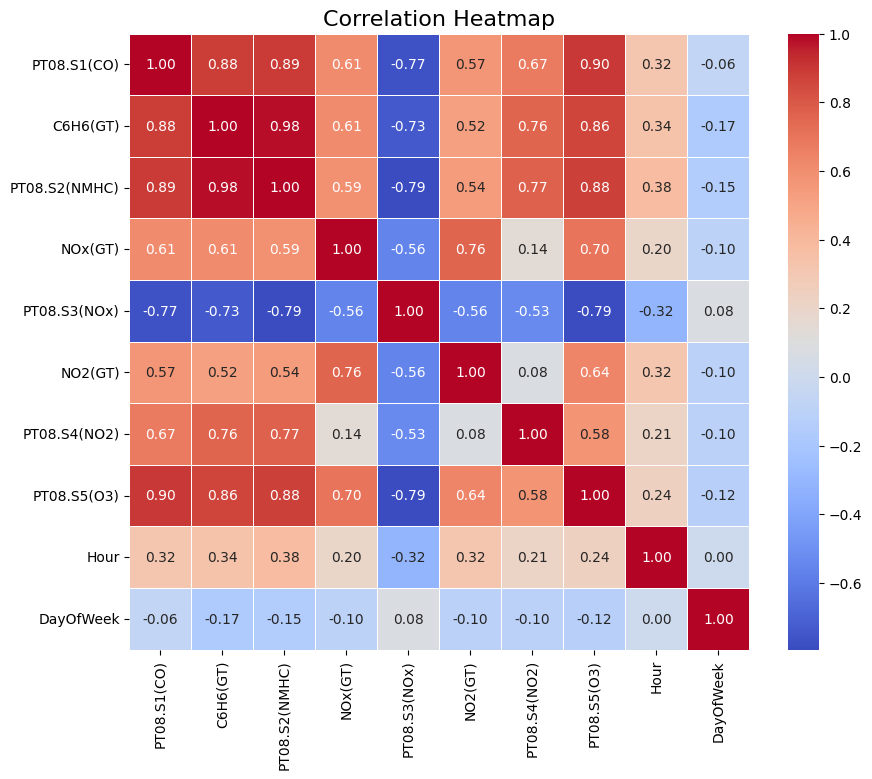

In [ ]:
correlation_table = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


### Removal of four most (positively) correlated features

In [ ]:
dataset2 = dataset.drop(['PT08.S5(O3)', 'PT08.S2(NMHC)','C6H6(GT)','PT08.S4(NO2)'], axis=1)


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PT08.S1(CO)   9357 non-null   float64
 1   NOx(GT)       9357 non-null   float64
 2   PT08.S3(NOx)  9357 non-null   float64
 3   NO2(GT)       9357 non-null   float64
 4   Hour          9357 non-null   int32  
 5   DayOfWeek     9357 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 438.6 KB


### Re-fit the best model of RF

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Fit the randomized search model
randomized_search_rf.fit(dataset2, target)

#Access the best RANSAC model with tuned parameters
best_rf_model = randomized_search_rf.best_estimator_

#Perform cross-validation with predictions
predictions = cross_val_predict(best_rf_model, dataset2, target, cv=5)

#Calculate the errors
mae = mean_absolute_error(target, predictions)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R²: {r2:.3f}")



Mean Absolute Error (MAE): 0.549
Mean Squared Error (MSE): 0.608
R²: 0.663


### Removal of 4 least correlated features

In [ ]:
dataset3 = dataset.drop(['DayOfWeek', 'Hour','NO2(GT)'], axis=1)


In [ ]:
randomized_search_rf.fit(dataset3, target)

best_rf_model = randomized_search_rf.best_estimator_

predictions = cross_val_predict(best_rf_model, dataset3, target, cv=5)

mae = mean_absolute_error(target, predictions)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R²: {r2:.3f}")

Mean Absolute Error (MAE): 0.497
Mean Squared Error (MSE): 0.541
R²: 0.700


## Error Analysis

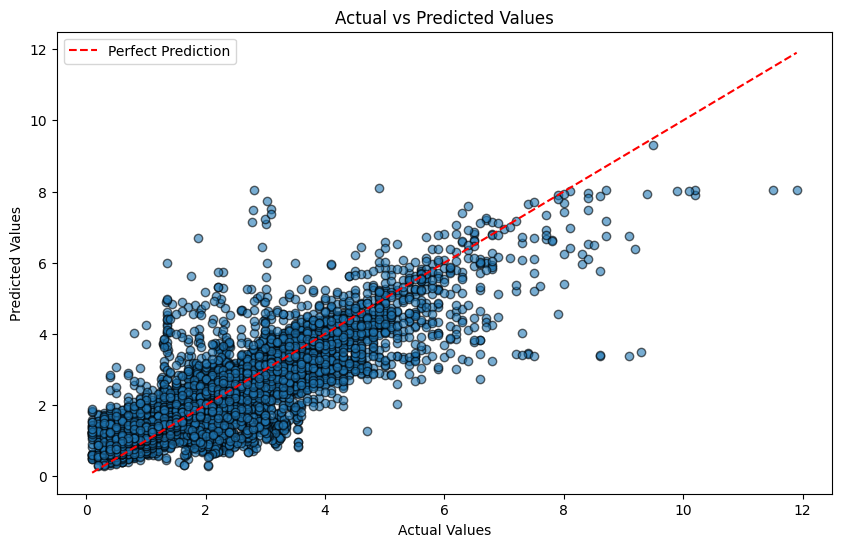

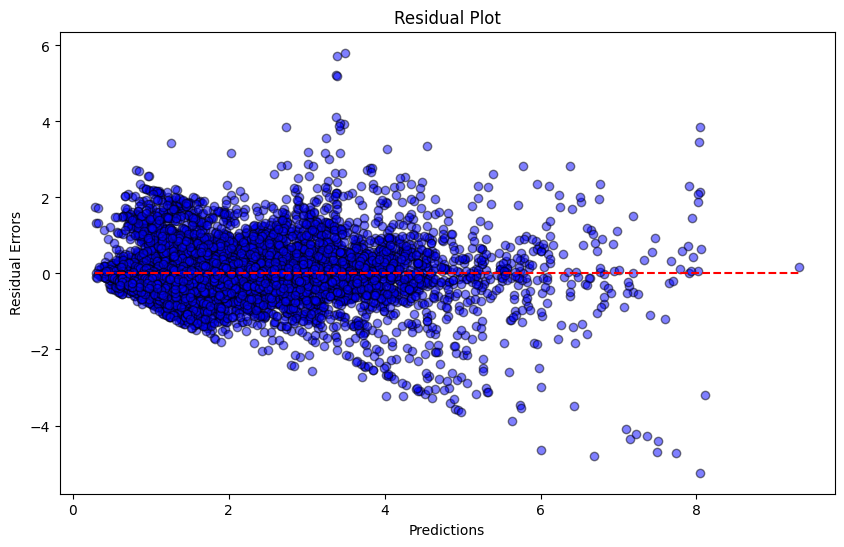

High-error cases:
      True Values  Predictions  Residuals
25            6.9     4.480955   2.419045
26            6.1     4.218934   1.881066
27            3.9     2.210696   1.689304
38            4.4     2.844675   1.555325
50            6.6     4.645729   1.954271
...           ...          ...        ...
8774          1.5     3.113184  -1.613184
8776          3.0     4.576021  -1.576021
8785          3.4     5.126600  -1.726600
9051          4.3     2.683580   1.616420
9117          1.4     2.941802  -1.541802

[478 rows x 3 columns]


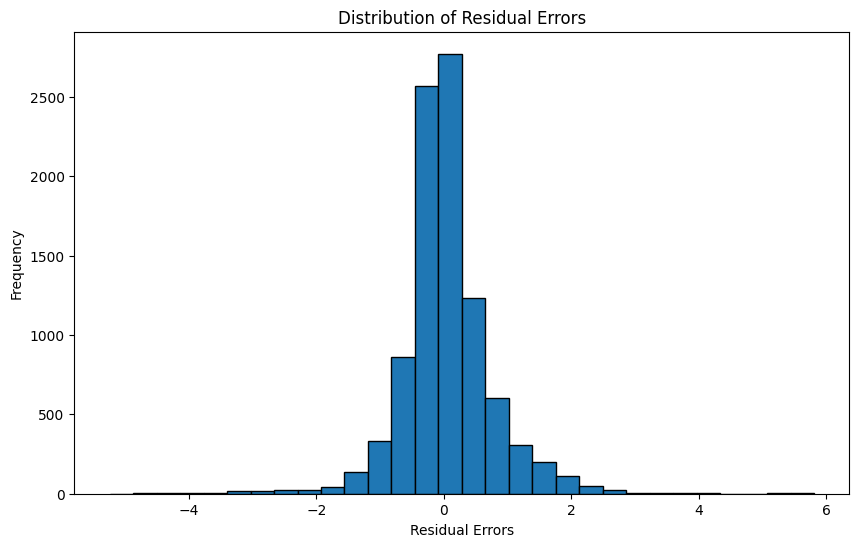

Mean Absolute Error (MAE): 0.478
Mean Squared Error (MSE): 0.517
R²: 0.714


In [ ]:
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

randomized_search_rf.fit(dataset, target)

best_rf_model = randomized_search_rf.best_estimator_

predictions = cross_val_predict(best_rf_model, dataset, target, cv=5)

residuals = target - predictions
mae = mean_absolute_error(target, predictions)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

#Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(target, predictions, alpha=0.6, edgecolor='k')
plt.plot([min(target), max(target)], [min(target), max(target)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#Plot residual errors
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', edgecolors='k', alpha=0.5)
plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predictions')
plt.ylabel('Residual Errors')
plt.show()

#Display detailed error values (absolute)
error_details = pd.DataFrame({
    'True Values': target,
    'Predictions': predictions,
    'Residuals': residuals
})

#Analyze errors for specific subsets (high-error cases)
high_error_threshold = 1.5
high_error_cases = error_details[abs(error_details['Residuals']) > high_error_threshold]

print("High-error cases:")
print(high_error_cases)

#Histogram of residual errors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residual Errors')
plt.xlabel('Residual Errors')
plt.ylabel('Frequency')
plt.show()

#Error statistics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R²: {r2:.3f}")


## Comparison of RF with Baseline Models

### Comparison with Dummy Regressor


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

dummy = DummyRegressor(strategy="mean")

cv_result = cross_validate(dummy, dataset, target, cv=5, scoring=['r2', 'neg_mean_absolute_error'])
r2_scores = cv_result['test_r2']
mae_scores = -cv_result['test_neg_mean_absolute_error']

print("Model: DummyRegressor (strategy='mean')")
print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}\n")


Model: DummyRegressor (strategy='mean')
Mean R²: -0.108 ± 0.127
Mean MAE: 1.026 ± 0.151



### Comparison with K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

model= KNeighborsRegressor()

cv_result = cross_validate(model, dataset, target, cv=5, scoring=['r2', 'neg_mean_absolute_error'])
r2_scores = cv_result['test_r2']
mae_scores = -cv_result['test_neg_mean_absolute_error']

print("Model: KNN")
print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Mean MAE: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}\n")

Model: KNN
Mean R²: 0.600 ± 0.110
Mean MAE: 0.554 ± 0.089

